## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [11]:
pip install xlrd

   ---------------------------------------- 0.0/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.6 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.6 kB 217.9 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.6 kB 521.8 kB/s eta 0:00:01
   ---------------------------------------- 96.6/96.6 kB 501.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#loading the data
dataset = pd.read_excel("default of credit card clients.xls")
dataset.columns = dataset.iloc[0]

# Drop the first row 
dataset = dataset[1:]

# Drop the 'ID' column 
dataset.drop(['ID'], axis=1, inplace=True)

In the following, you can take a look into the dataset.

In [63]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [67]:
# Define features and target
X = dataset.drop("default payment next month", axis=1)
y = dataset["default payment next month"].astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Model 1: Default parameters
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)
y_pred1 = dt1.predict(X_test)

print("Decision Tree - Default Parameters")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Model 2: Custom parameters
dt2 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt2.fit(X_train, y_train)
y_pred2 = dt2.predict(X_test)

print("\nDecision Tree - max_depth=5, min_samples_split=10")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))


Decision Tree - Default Parameters
Confusion Matrix:
 [[3741  932]
 [ 781  546]]
Accuracy: 0.7145
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4673
           1       0.37      0.41      0.39      1327

    accuracy                           0.71      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000


Decision Tree - max_depth=5, min_samples_split=10
Confusion Matrix:
 [[4431  242]
 [ 855  472]]
Accuracy: 0.8171666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [71]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter search space
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,                # Number of combinations to try
    scoring='accuracy',
    cv=5,                     # 5-fold cross-validation
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and evaluation
best_dt = random_search.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("Best Parameters Found:\n", random_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters Found:
 {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 3, 'criterion': 'gini'}

Confusion Matrix:
 [[4423  250]
 [ 838  489]]
Accuracy: 0.8186666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



**Findings:**
- Decision Tree Classifier had an accuracy of 71.5% with the default parameters.
- After using modified the hyperparameters (i.e., max_depth=5, min_samples_split=10) the accuracy increased to 81.7%.
- After applying RandomizedSearchCV to build the random forest model, the accuracy was 81.9%.

**Discussion:**
- RandomizedSearchCV finds better parameters automatically by exploring the parameter space randomly and efficiently. Because it uses cross-validation, it typically generalizes better and avoids overfitting to the training data.

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


Random Forest Accuracy: 0.8120


C:\Users\anany\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8148
Extra Trees Accuracy: 0.8083
Gradient Boosting Accuracy: 0.8183


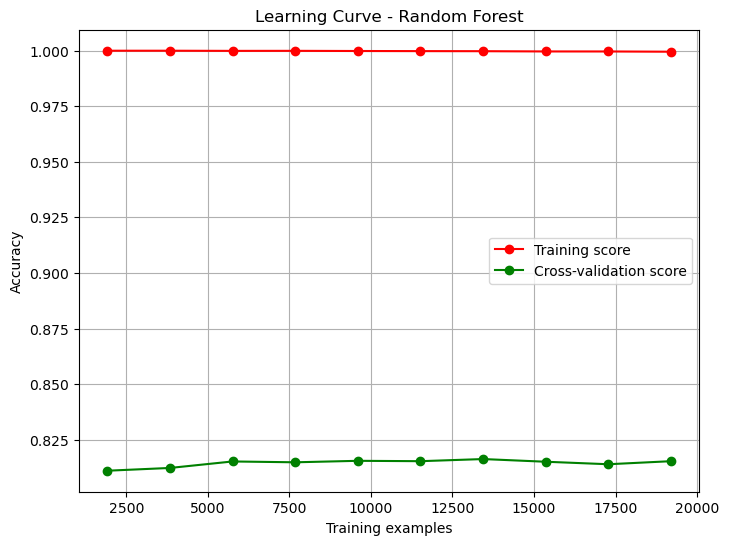

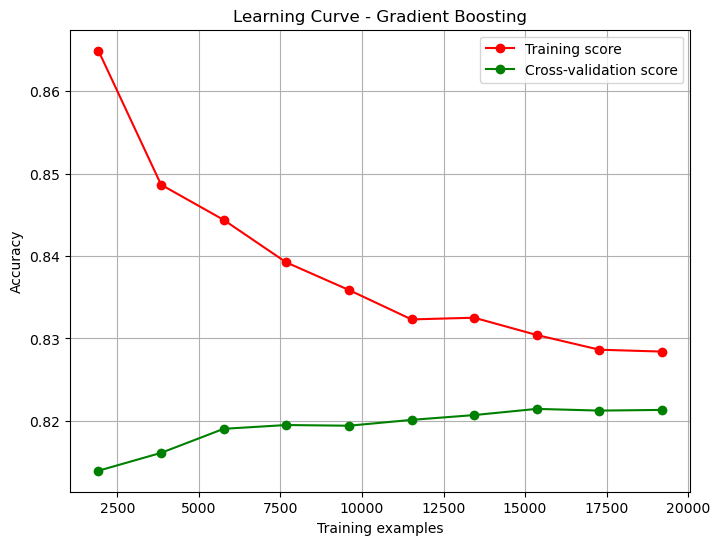

In [75]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Train ensemble models

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

# Function to plot learning curve

def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(8,6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for Random Forest and Gradient Boosting

plot_learning_curve(models["Random Forest"], "Learning Curve - Random Forest", X_train, y_train)
plot_learning_curve(models["Gradient Boosting"], "Learning Curve - Gradient Boosting", X_train, y_train)


#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

**How does changing hyperparameters affect model performance?**

- Tuning hyperparameters such as max_depth and min_samples_split significantly improved the decision tree's performance.

- The default decision tree had an accuracy of about 71.5%, with relatively poor recall (~41%) indicating many false negatives.

- By restricting the tree depth (max_depth=5) and increasing the minimum samples needed to split a node, accuracy rose to 81.7%, with recall improving slightly to 36% and precision rising to 66% for the default class.

- This shows that controlling model complexity helps reduce overfitting and leads to better generalization on unseen data.
- The automated hyperparameter tuning with RandomizedSearchCV found a model with slightly different parameters (max_depth=3, min_samples_split=20, min_samples_leaf=10).

- This model achieved an accuracy of 81.9%, a modest improvement over manual tuning.

- Precision and recall values for the default class were comparable but slightly better (recall of 37% vs. 36% in manual tuning), showing that systematic hyperparameter search with cross-validation can yield more robust models.

- RandomizedSearchCV also helps avoid manual guesswork and explores the parameter space more effectively.
- Ensemble Models Accuracies:
Random Forest:	81.2%
AdaBoost:	81.5%
Extra Trees:	80.8%
Gradient Boosting:	81.8%

- All ensemble models improved performance compared to the basic decision tree.

- Gradient Boosting had the best accuracy (~81.8%), closely followed by AdaBoost and Random Forest.

- Ensembles combine multiple weak learners, reducing variance (Random Forest, Extra Trees) or bias (Boosting methods), leading to more stable and accurate predictions.

- The slight edge of Gradient Boosting is expected because it iteratively corrects errors of prior models, often yielding stronger predictive power for tabular data.

**Why do you think certain models performed better/worse?**

- The single Decision Tree models are prone to overfitting or underfitting depending on hyperparameters, which can limit their accuracy and stability.

- Ensemble methods aggregate predictions from multiple trees, reducing variance and improving generalization.

- Random Forest and Extra Trees reduce variance through averaging many randomized trees.

- Boosting methods like AdaBoost and Gradient Boosting focus on reducing bias by learning sequentially from mistakes, often outperforming bagging ensembles for complex datasets.

- The dataset’s nature (tabular, structured, some imbalance) suits tree-based ensemble models well.

**How does this performance line up with known strengths/weakness of these models?**e to overfittinf not tuned




Decision Tree
- Easy to interpret, fast, handles non-linearity
- Overfits easily, sensitive to parameters

Random Forest
- Reduces overfitting, robust, good for many data
- Less interpretable than single trees

AdaBoost
- Focuses on hard examples, can improve bias
- Sensitive to noisy data and outliers


Extra Trees
- Faster than RF, adds randomness to reduce variance
- Can still overfit with noisy features


Gradient Boosting
- High predictive power, handles bias and variance
- Computationally expensive, prone to overfitting if not tuned